# [SciPY](https://docs.scipy.org/doc/scipy/index.html)

> SciPy is a collection of **mathematical algorithms and convenience functions** built on the NumPy extension of Python. - scippy doc

In this page, you see examples of scipy functions (differentiation, integration, optimization) to solve problems.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate, diff, optimize

## Differentiation
### scipy.integrate.solve_ivp
Solve an **initial value problem** for a system of ODEs.

$$ \frac{dy}{dt} = f(t, y), \quad y(t_0) = y_0 $$

>```python
>scipy.integrate.solve_ivp(fun, t_span, y0, method='RK45', t_eval=None,\
>    dense_output=False, events=None, vectorized=False, args=None, **options)
>```

Solve the Lotka-Volterra equations

$$ \frac{dx}{dt} = ax - bxy ,\quad \frac{dy}{dt} = -cx + dxy  $$

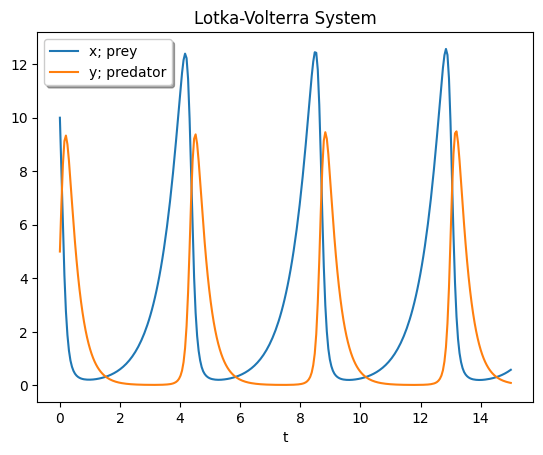

In [2]:
from scipy.integrate import solve_ivp

def lotkavolterra(t, z, a, b, c, d):
    x, y = z
    return [a*x - b*x*y, -c*y + d*x*y]

sol = solve_ivp(lotkavolterra, [0, 15], [10, 5], args=(1.5, 1,   3, 1),dense_output=True)

t = np.linspace(0, 15, 300)
z = sol.sol(t)

plt.plot(t, z.T)
plt.xlabel('t')
plt.legend(['x; prey', 'y; predator'], shadow=True)
plt.title('Lotka-Volterra System')
plt.show()

---
## Integration
### scipy.integrate.quad
Compute a definite integral.

>```python
>scipy.integrate.quad(func, a, b, args=(), full_output=0, epsabs=1.49e-08, epsrel=1.49e-08,\
>    limit=50, points=None, weight=None, wvar=None, wopts=None, maxp1=50, limlst=50)
>```

Return `y` and `abserr`.
- y(float): The integral of func from a to b.
- abserr(float): An estimate of the absolute error in the result.

In [3]:
x2 = lambda x: x**2
ans = integrate.quad(x2, 0, 4)  # numerical result
print(ans)

print(4**3 / 3.)  # analytical result

(21.333333333333332, 2.3684757858670003e-13)
21.333333333333332


---
## Root finding
### scipy.optimize.root_scalar
Find a root of a scalar function.
>```python
>scipy.optimize.root_scalar(f, args=(), method=None, bracket=None, fprime=None, fprime2=None,\
>    x0=None, x1=None, xtol=None, rtol=None, maxiter=None, options=None)
>```

find a root of a scalar function

$$f(x) = x^2 - x -1 $$

In [4]:
from scipy import optimize
def f(x):
    return x**2 -x - 1

sol = optimize.root_scalar(f, bracket=[0, 3]) # numerical result
print(sol.root)

print((1+np.sqrt(5))/2) # analytical result

1.618033988749895
1.618033988749895


---
### scipy.optimize.root
Find a root of a vector function.

>```python
>scipy.optimize.root(func, x0, args=(), method='hybr', jac=None, tol=None,
>                    callback=None, options=None)
>```

In [5]:
def fun(x):
    return [x[0]  + 0.5 * (x[0] - x[1])**3 - 1.0,
    0.5 * (x[1] - x[0])**3 + x[1]]

def jac(x):# Jacbian
    return np.array([[1 + 1.5 * (x[0] - x[1])**2,
                    -1.5 * (x[0] - x[1])**2],
                    [-1.5 * (x[1] - x[0])**2,
                    1 + 1.5 * (x[1] - x[0])**2]])

sol = optimize.root(fun, [0, 0], jac=jac, method='hybr')
print(sol.x)

[0.8411639 0.1588361]


---
### scipy.optimize.minimize
Local (multivariate) optimization

>```python
>scipy.optimize.minimize(fun, x0, args=(), method=None, jac=None, hess=None,\
>    hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
>```

find the minimum point of

$$ f(x,y) = (1-x)^2 + 5(y-x^2)^2 $$

In [6]:
from scipy.optimize import minimize

f = lambda x: (1 - x[0])**2 + 5*(x[1] - x[0]**2)**2
x0 = [-1,-1]
res = minimize(f, x0, method='CG',options={'disp': True})
res.x # solution

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 12
         Function evaluations: 84
         Gradient evaluations: 28


array([0.9999993 , 0.99999854])

---
### scipy.optimize.least_squares
Least-squares
>```python
>scipy.optimize.least_squares(fun, x0, jac='2-point', bounds=(- inf, inf), method='trf', ftol=1e-08,\
>    xtol=1e-08, gtol=1e-08, x_scale=1.0, loss='linear', f_scale=1.0, diff_step=None, tr_solver=None,\
>    tr_options={}, jac_sparsity=None, max_nfev=None, verbose=0, args=(), kwargs={})
>```

[2.94317303 0.5177017  3.0569648 ] 1


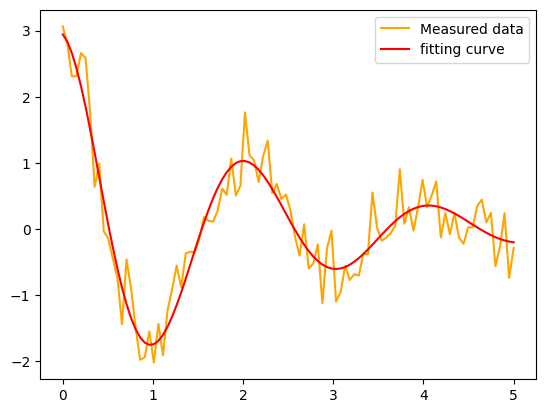

In [7]:
# Solve a nonlinear least-squares problem with bounds on the variables.
import os
import scipy.optimize as opt

fitFunc = lambda p,t: p[0]*np.exp(-p[1]*t)*np.cos(p[2]*t)
errFunc = lambda p,t,u: fitFunc(p,t) - u

x = np.linspace(0,5,100)
y = fitFunc([3,0.5,3],x) + np.random.randn(len(x))/3

p0 = [1,1,1]# Initial values
(p,success) = opt.leastsq(errFunc, p0, args=(x,y))
print(p,success)
nfit = fitFunc(p,x)

plt.plot(x,y,label = 'Measured data', color = 'orange')
plt.plot(x,nfit,label = 'fitting curve', color = 'red')
plt.legend()
plt.show()